# KMeans 
> - Choose number of clusters *k*  
> - Choose an **objective function** for selecting *k*  
> - Try various values of *k* such that the **value of objective function** is maximized or minimized  
> - **Objective function** is **Sum Squared Distance**  
> - **Elbow method** is a popular way of choosing *k*  
#### Reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

## Wholesale Data
### Feature 1: Types of products (Fresh, Milk, Grocery, Frozen, Detergents, Delicassen)
### Feature 2: Purchasing behavior (Channel and Region) 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
wholesale = pd.read_csv("Wholesale_customers_data.csv")

In [2]:
wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
wholesale.shape

(440, 8)

In [4]:
categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 
                       'Detergents_Paper', 'Delicassen']

In [5]:
wholesale[continuous_features].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
df1 = wholesale[continuous_features]

> **fit** and **transform** are a pair for transforming the data.  
> **Kmeans(n_clusters=k)** sets the model framework.  
> **Kmeans(n_clusters=k).fit(data)** estimates the model.  
> **Kmeans(n_clusters=k).fit(data).inertia_** provides the sum squared error.  

In [7]:
from sklearn.preprocessing import MinMaxScaler # (Value-Min)/(Max-Min)
mms = MinMaxScaler()
mms.fit(df1)
df1 = mms.transform(df1)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(df1)
y_kmeans = kmeans.predict(df1)

In [9]:
centers = kmeans.cluster_centers_
pd.DataFrame(centers,columns=continuous_features,index=range(1,6))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
1,0.079315,0.041126,0.041647,0.043862,0.024727,0.021675
2,0.142329,0.471842,0.523124,0.049793,0.609254,0.061322
3,0.322837,0.068403,0.061179,0.098276,0.022222,0.045945
4,0.051815,0.145674,0.183377,0.023605,0.180126,0.038898
5,0.310117,0.412728,0.182103,0.800021,0.018433,0.558469


## Create Dummy for Categorical Attributes
> Both **set(data)** and **data.unique()** give unique elements in data.  
> Suppose $x$ has 3 categories {1,2,3}:  
> **get_dummies(x, prefix='VAR' )** gives $VAR_1$, $VAR_2$, and $VAR_3$.   

In [10]:
# There are: 3 values of 'Channel'={1,2} & 2 values of 'Region'={1,2,3}
print(set(wholesale['Channel']))
print(set(wholesale['Region']))
print(type(set(wholesale['Channel'])))

{1, 2}
{1, 2, 3}
<class 'set'>


In [11]:
print(wholesale['Channel'].unique())
print(wholesale['Region'].unique())
print(type(wholesale['Channel'].unique()))

[2 1]
[3 1 2]
<class 'numpy.ndarray'>


In [12]:
pd.get_dummies(wholesale['Channel'], prefix='Channel' ).head()

,Channel_1,Channel_2
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1


In [13]:
# col represents 'Channel' and 'Region'
# These 2 words are set as prefix
# Combine original data with the 5 new dummies
# After creating new dummies, drop them off from the original data
print(categorical_features)

for i in categorical_features:
    dummies = pd.get_dummies(wholesale[i], prefix=i)
    wholesale = pd.concat([wholesale, dummies], axis=1)
    wholesale.drop(i, axis=1, inplace=True)
    
wholesale.head()

['Channel', 'Region']


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [14]:
mms = MinMaxScaler()
mms.fit(wholesale)
data = mms.transform(wholesale)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [15]:
# Initialize a container for Sum Squared Error

sqerror = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)   # Specify model options
    km = km.fit(data) # Fit the data
    sqerror.append(km.inertia_)

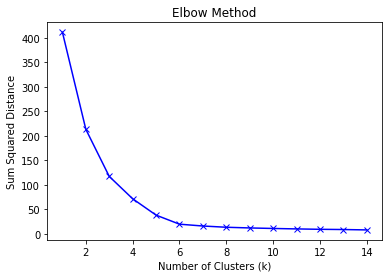

In [16]:
plt.plot(K, sqerror, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum Squared Distance')
plt.title('Elbow Method')
plt.show()

## Activity 1
> Use the following data to estimate the KMeans. 

In [17]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
print(X.shape)
print(y_true.shape)

(300, 2)
(300,)


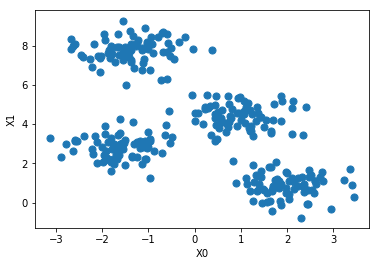

In [18]:
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel('X0')
plt.ylabel('X1');

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [20]:
import pandas as pd
centers = kmeans.cluster_centers_
pd.DataFrame(centers,columns=['X0','X1'], index=range(1,5))

,X0,X1
1,0.949735,4.419069
2,1.982583,0.867713
3,-1.584385,2.830813
4,-1.373244,7.753689


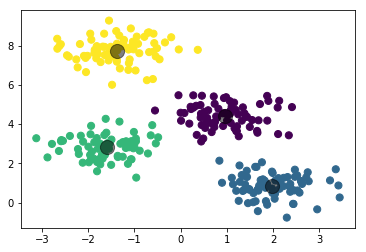

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);